ИССЛЕДОВАНИЕ И ПРИМЕНЕНИЕ БИОНИЧЕСКИХ МЕТОДОВ И МОДЕЛЕЙ ДЛЯ АВТОМАТИЗИРОВАННОГО ПРОЕКТИРОВАНИЯ МАРШРУТОВ ОБХОДА ГЕОМЕТРИЧЕСКИХ ОБЪЕКТОВ (ПРЯМОУГОЛЬНИКОВ)

Справка по алгоритму:

In [17]:
from IPython.display import FileLink, FileLinks
FileLink('/Users/a17267810/Documents/help.docx')

/Users/a17267810/Documents/help.docx

Генерация фигур<br>
Введите значения:<br>
count - количество фигур<br>
space_max_x - размер осей выводимого графика
path - путь до выгружаемого файла .csv с фигурами

In [18]:
count=100
space_max_x=100
path='rectangles_file.csv'

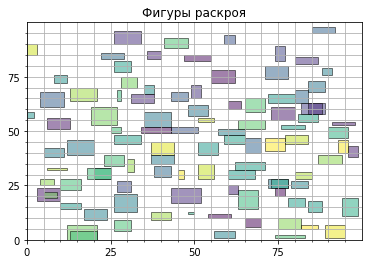

In [19]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import src.utils as my_utils
from src.initializer import FigureInitializer
initializer = FigureInitializer(count=count, space_max_x=space_max_x, space_max_y=space_max_x)
rectangles = initializer.generate_rectangles()
my_utils.draw_plot(my_utils.rectangles_to_math_rectangle(rectangles), initializer.space_max_x)
my_utils.write_rectangles(rectangles, path)

Введите стартовую точку

In [20]:
from src.entities import Point
startPoint = Point(0, 0)

Случайный алгоритм

Column names are left_bottom_x, left_bottom_y, width, height
Processed 101 lines.


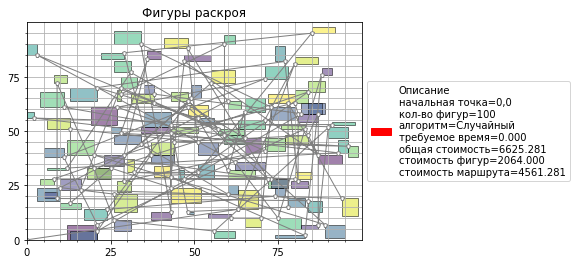

In [21]:
import src.cutting as cutting
from src.cutting import RandomAlgorithm, GeneticAlgorithm, GreedyAlgorithm
read_rectangles = my_utils.read_rectangles(path)
random_algorithm = RandomAlgorithm(startPoint, read_rectangles)
cutting.run_algorithm(random_algorithm, read_rectangles, space_max_x)

Жадный алгоритм

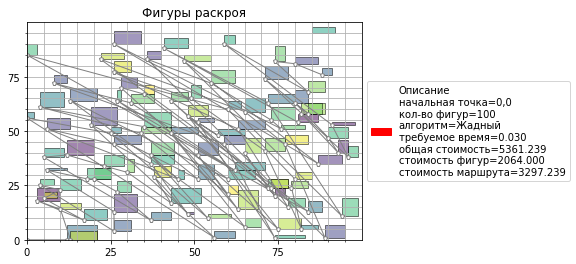

In [22]:
greedy_algorithm = GreedyAlgorithm(startPoint, rectangles)
cutting.run_algorithm(greedy_algorithm, rectangles, space_max_x)

Генетический алгоритм<br>
Введите значения:<br>
population_size - размер популяции<br>
num_generations - количество поколений<br>
num_parents_mating - количество родителей<br>
num_mutations - количество мутаций<br>
num_gen_twist - количество генов, участвующие в операции смешивания<br>

In [23]:
population_size=8
num_generations=1000
num_parents_mating=4
num_mutations=None
num_gen_twist=None

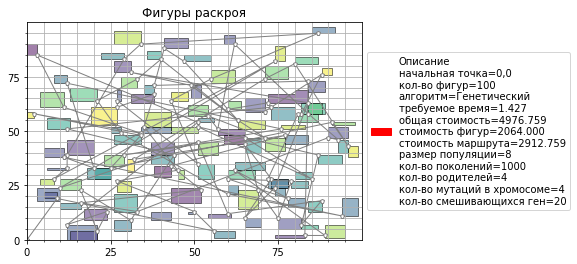

In [24]:
genetic_algorithm = GeneticAlgorithm(startPoint, rectangles)
cutting.run_genetic(rectangles, startPoint, population_size, num_generations, num_parents_mating, space_max_x, num_mutations, num_gen_twist)